### **Market Size of EVs: Case Study**

##### Market Size Analysis is the process of estimating the potential sales for a product or service within a particular market segment. In the context of electric vehicles (EVs), it involves assessing the total volume of EV registrations to understand the growth of the market, forecast future trends, and help stakeholders make informed decisions regarding production, infrastructure development, and policy-making.

##### The provided dataset contains the following columns, each representing different aspects of the electric vehicle (EV) population in the United States:

* **VIN (1-10)**: Partial Vehicle Identification Number.
* **County**: The county in which the vehicle is registered.
* **City**: The city in which the vehicle is registered.
* **State**: The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.
* **Postal Code**: The postal code where the vehicle is registered.
* **Model Year**: The year of the vehicle model.
* **Make**: The manufacturer of the vehicle.
* **Model**: The model of the vehicle.
* **Electric Vehicle Type**: The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).
* **Clean Alternative Fuel Vehicle (CAFV) Eligibility**: Eligibility status for clean alternative fuel vehicle programs.
* **Electric Range**: The maximum range of the vehicle on a single charge (in miles).
* **Base MSRP**: The Manufacturer’s Suggested Retail Price.
* **Legislative District**: The legislative district where the vehicle is registered.
* **DOL Vehicle ID**: Department of Licensing Vehicle Identification.
* **Vehicle Location**: Geographic coordinates of the vehicle location.
* **Electric Utility**: The electric utility service provider for the vehicle’s location.
* **2020 Census Tract**: The census tract for the vehicle’s location.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")

In [3]:
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
ev_data.head(3)   

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [4]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
# Checking null values
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [6]:
ev_data.dropna(inplace=True)


### For the task of market size of electric vehicles analysis, we will explore the following areas:

1. __EV Adoption Over Time__: Analyze the growth of the EV population by model year.
2. __Geographical Distribution__: Understand where EVs are most commonly registered (e.g., by county or city).
3. __EV Types__: Breakdown of the dataset by electric vehicle type (BEV, etc.).
4. __Make and Model Popularity__: Identify the most popular makes and models among the registered EVs.
5. __Electric Range Analysis__: Analyze the electric range of vehicles to see how EV technology is progressing.
6. __Estimated Growth in Market Size__: Analyze and find the estimated growth in the market size of electric vehicles.

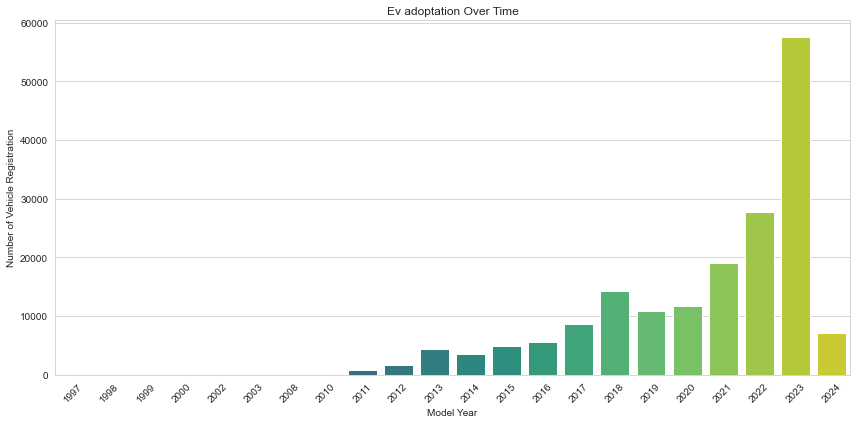

In [7]:
## EV adoptation Over Time
plt.figure(figsize=(12,6))
ev_adoption_by_year = ev_data["Model Year"].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")

plt.title("Ev adoptation Over Time")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicle Registration")
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

 From the above bar chart, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around **2016**. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.

__selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties__:

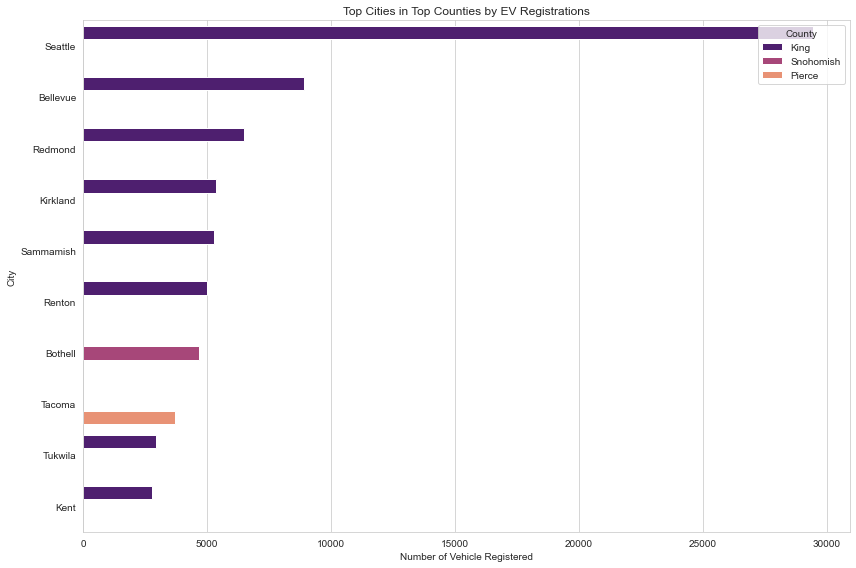

In [8]:
### geographical distribution at country level
ev_county_distribution = ev_data["County"].value_counts()
top_3_county = ev_county_distribution.head(3).index

### Filtering the dataset for these top counties
top_counties_data = ev_data[ev_data["County"].isin(top_3_county)]

##  analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name="Number of Vehicles")
## visualize the top 10 cities across these countries
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles',y="City",hue="County",data=top_cities,palette="magma")
plt.title("Top Cities in Top Counties by EV Registrations")
plt.xlabel("Number of Vehicle Registered")
plt.ylabel("City")
plt.legend(title="County")
plt.tight_layout()
plt.show()

* > We can see that _Seattle_, Which is in king County, has the highest number of EV registration by a significant margin, far outpacing the other cities listed.
* > _Bellevue_ and _Redmond_, also in King County, follow Seattle with the next highest registrations, though these are considerably less than _Seattle’s_.
* > Cities in Snohomish County, such as _Kirkland_ and _Sammamish_, show moderate EV registrations.
* >_Tacoma_ and _Tukwila_, representing Pierce County, have the fewest EV registrations among the cities listed, with Tacoma slightly ahead of Tukwila.
* > The majority of cities shown are from _King County_, which seems to dominate EV registrations among the three counties.
* > Overall, the graph indicates that **_EV adoption_** is not uniform across the cities and is more concentrated in certain areas, particularly in **_King County_**.

*  Let's explore the types of eletric vehicles represented in this dataset. Understanding the breakdown between **EV types** , such as **_Battery Electric Vehicles_** (BEV) and **_Plug-in Hybrid Electric Vehicles (PHEV)_** , Can provide insights into consumer preference and the adoption patterns of purely Electric Vs Hybrid Electric solutions.

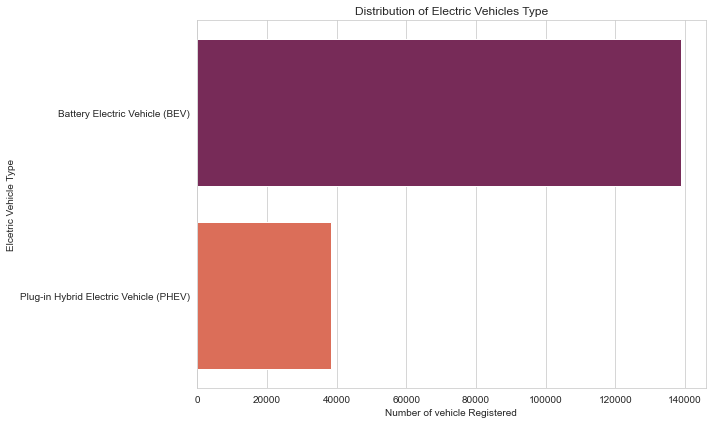

In [9]:
# analyzing the distribution of electric vehicle types

ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index,palette='rocket')
plt.title("Distribution of Electric Vehicles Type")
plt.xlabel("Number of vehicle Registered")
plt.ylabel("Elcetric Vehicle Type")
plt.tight_layout()

plt.show()

* > The above graph shows that **_BEVs_** are more popular or preferred over **_PHEVs_** among the electric vechiles registered.

*_Let's now focus on the popularity of electric vehicle manufactures and models among the registered vehicles.This analysis will help us identify which manufactures and specific models dominate the EV market._*

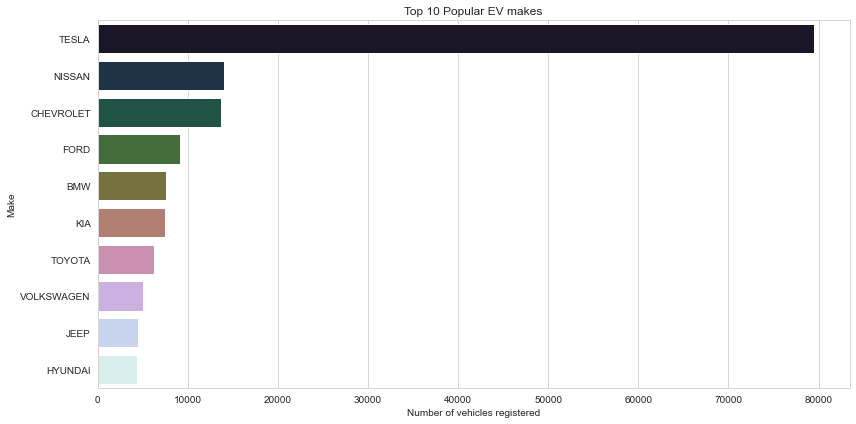

In [10]:
# analyzing the popularity of EV manufactures
ev_data.head()
ev_make_distribution = ev_data["Make"].value_counts().head(10)
ev_make_distribution

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette='cubehelix')
plt.title("Top 10 Popular EV makes")
plt.xlabel("Number of vehicles registered")
plt.ylabel("Make")
plt.tight_layout()
plt.show()

The above chart shows that:
* > TESLA leads by a substantial margin with the highest number of vehicles registered.
* > NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.
* > FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI follow in decreasing order of the number of registered vehicles.

_Let's drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:_

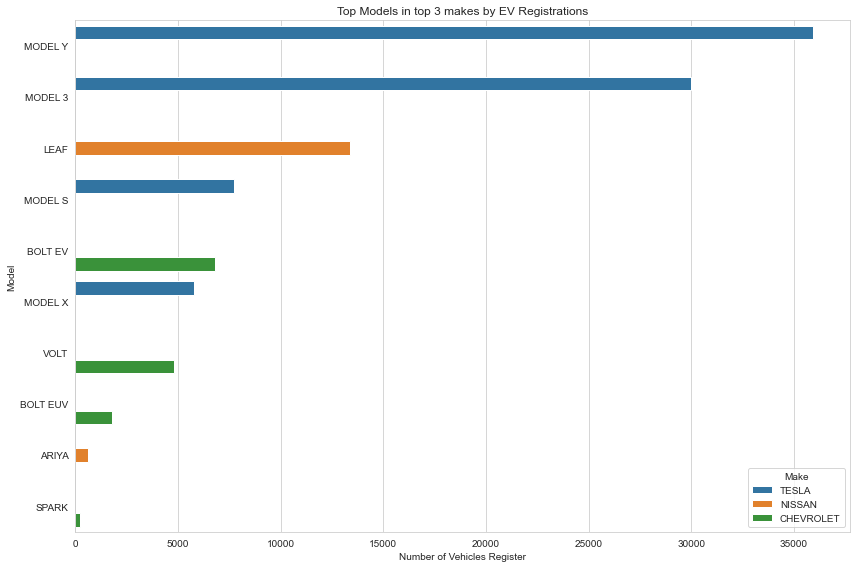

In [11]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_make = ev_make_distribution.head(3).index

# filtering the dataset for these top manufaturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_make)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)
top_models

plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles',y='Model',hue='Make',data=top_models)
plt.title("Top Models in top 3 makes by EV Registrations")
plt.xlabel("Number of Vehicles Register")
plt.ylabel("Model")
plt.legend(title='Make',loc='lower right')
plt.tight_layout()
plt.show()


_The above graph shows the distribution of electric vehicle registration among different models from the top three manufacturers: **TESLA** , **NISSION**, **CHEVROLET**_

 **Now we’ll explore the electric range of vehicles, which is a critical factor for analyzing the market size of electric vehicles. The electric range indicates how far an EV can travel on a single charge, and advancements in battery technology have been steadily increasing these ranges over the years.**

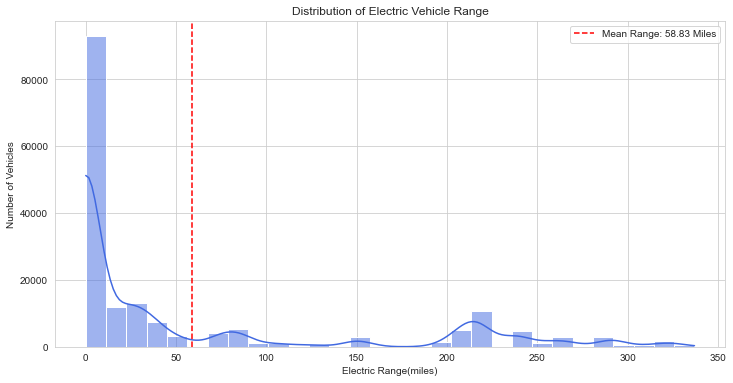

In [12]:
ev_data.head()
# analyzing the dustribution of electric range
plt.figure(figsize = (12,6))
sns.histplot(data = ev_data["Electric Range"],bins = 30, kde=True,color = 'royalblue')
plt.title("Distribution of Electric Vehicle Range")
plt.xlabel("Electric Range(miles)")
plt.ylabel("Number of Vehicles")
plt.axvline(ev_data["Electric Range"].mean(),color='red',linestyle='--',label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} Miles')
plt.legend()
plt.show()


The above graph shows the mean electric range. Key Observations from the graph include:
* > _There is high frequency of vehicels with a low electric range, with a significant peak occuring just before 50 miles._
*  > _The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent._
* > _The mean electric range for the set of vehicels is marked at approximatley 58.84 miles, which is relatively low comapered to the highest ranges shown in the graph._
*  > Despite the presence of electric vehicles with ranges that extended up to around 350 miles, the majority of the vehicels have a range below the mean.

**Now lets drive into the trend of electric ranges over model year, which can provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicle over time. A positive trend in this analysis would indicate continuous improvements, offering consumers EVs with longer driving ranges and protentiall addressing one of the major concerns regarding the EV market(range anxity).**

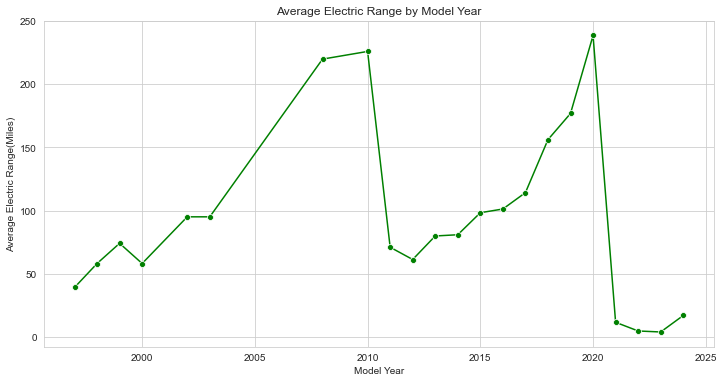

In [13]:
ev_data.head()
#calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=average_range_by_year,x='Model Year',y='Electric Range',marker='o',color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range(Miles)')
plt.show()

**The Above graph shows the progression of the average electric range of vehicles from around Year 2000 to 2024.Key finding from the graph:**

* > There is general upward trends in the average electric range of EVs over the years, indicating improvements in technology and battery efficency.
* > There is a noticeable peak around the year 2020 when the average range reaches its highest point.
* > Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.
* > After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.

**let’s explore how electric ranges vary among the top manufacturers and models. This analysis can reveal how different manufacturers are addressing the crucial aspect of electric range and highlight which models stand out for their superior range capabilities:**

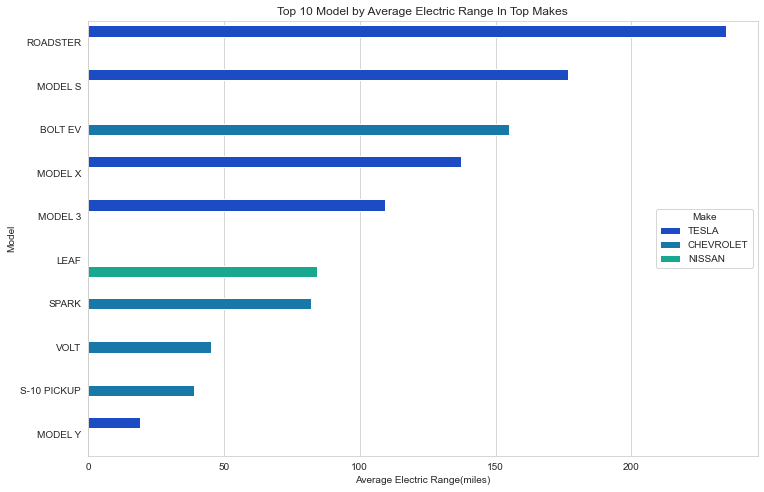

In [14]:
average_range_by_model = top_makes_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range

top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12,8))

barplot = sns.barplot(x="Electric Range", y="Model", hue="Make",data=top_range_models, palette="winter")
plt.title("Top 10 Model by Average Electric Range In Top Makes")
plt.xlabel("Average Electric Range(miles)")
plt.ylabel("Model")

plt.legend(title="Make", loc="center right")
plt.show()

The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.

### Estimated Market Size Analysis of Electric Vehicles in the United States

In [15]:
## Calculate the number of  EV registered in each year 
ev_registration_counts = ev_data["Model Year"].value_counts().sort_index()
ev_registration_counts

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: Model Year, dtype: int64

**The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years**:

**In 2021, there were 19,063 EVs registered.
In 2022, the number increased to 27708 EVs.
In 2023, a significant jump to 57,519 EVs was observed.
For 2024, currently, 7,072 EVs are registered, which suggests partial data.
To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years**.

### **We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years**

In [18]:
from scipy.optimize import curve_fit
import numpy as np

## filter the dataset to include years with complete data, assuming 2023 is the last complete year

filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

forecasted_evs


{2024: 79079.20808938889,
 2025: 119653.96274428742,
 2026: 181047.22020265696,
 2027: 273940.74706208805,
 2028: 414497.01805382164,
 2029: 627171.3128407666}

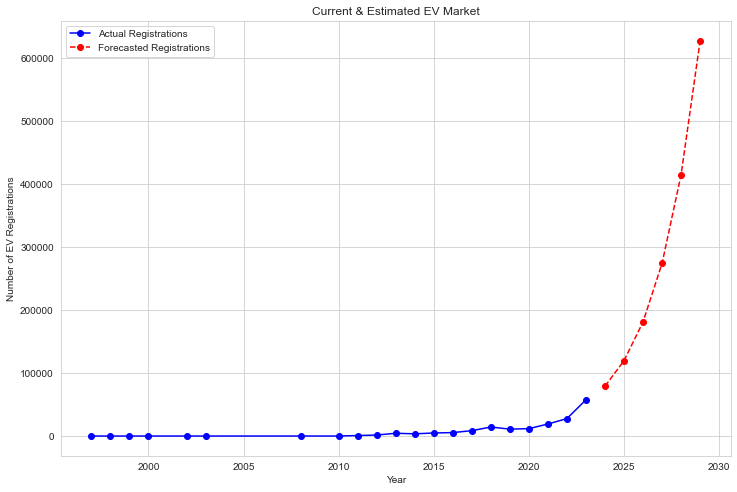

In [19]:
# Prepare data for ploting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]


plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()


From the above graph, we can see:

> * The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.
> * The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.

Given the growing trend in actual EV registrations and the projected acceleration as per the forecast data, we can conclude that the EV market size is expected to expand considerably. The steep increase in forecasted registrations suggests that consumer adoption of EVs is on the rise, and this trend is likely to continue. Overall, the data point towards a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.

## Summary

So, market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps businesses understand the magnitude of demand, assess market saturation levels, and identify growth opportunities. From our market size analysis of electric vehicles, we found a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.